In [2]:
#pip install biopython
#pip install matplotlib

     |████████████████████████████████| 11.3 MB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 895 kB 38.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 7.9 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [1]:
import datetime
import os.path

import matplotlib.pyplot as plt

from Bio.Seq import Seq, back_transcribe
from Bio import SeqIO

# 1. Class that describes hamsters.

Python class for hamsters.\
For creation "hamster" object it is nedeed to know its name and age (in months).\
Optionally, one can specify the type of hamster (for example, Syrian or Chinese). Default "Not defined".

In [137]:

class Hamster:
    '''
    Python class for hamsters.
    '''

    def __init__(self, name, age, hamster_type='Not defined'):
        '''
        For creation "hamster" object it is nedeed to know its name and age (in months).
        Optionally, one can specify the type of hamster (for example, Syrian or Chinese). Default "Not defined".
        '''
        self.name = name
        self.hamster_type = hamster_type
        self.age = age
        
        if self.age <= 4:
            self.stage = 'young'            
            
        elif self.age >= 12:
            self.stage = 'old'
        
        else:
            self.stage = 'adult'
        

    def life_stage(self):
        '''
        Method returns the age of a hamster: young, adult or old.
        '''        
        return f"{self.name} is an {self.stage} hamster. It's {self.age} months."


    def is_active(self):
        '''
        Checks if the hamster is probably asleep now. The system time is used. Return the string with state.
        '''
        time_now = datetime.datetime.now().hour
        
        if time_now > 7 and time_now < 20:
            return f'{self.name} is probably sleeping now.'
            
        else:
            return f'{self.name} is probably active now and wants treats.'


    def properties(self):
        '''
        Return string with the basic parameters of the hamster.
        '''
        if self.hamster_type == 'Not defined':            
            return f"The hamster\'s name is {self.name}. It\'s {self.stage} hamster, {self.age} months."
        else:
            return f"The hamster\'s name is {self.name}. It\'s {self.stage} {self.hamster_type} hamster, {self.age} months."

In [138]:
Bun = Hamster('Bun', 18, 'Djungarian hamster')
print(Bun.is_active())
print(Bun.properties())
print(Bun.life_stage())

Bun is probably active now and wants treats.
The hamster's name is Bun. It's old Djungarian hamster hamster, 18 months.
Bun is an old hamster. It's 18 months.


# 2. Class that describes RNA sequence data

Class (rooted from str class) with two methods:
- `RNA_translation` - Translation - returns a string corresponding to the protein from the RNA, according to the standard code, using Biopython.
- `RNA_to_DNA` - Reverse transcription method - returns a string corresponding to the DNA from RNA, using Biopython

In [163]:
class RNASequence(str):
    '''
    Class for operations with RNA sequences. Parent class - str.
    '''
    cls.acid_type = 'RNA'
    
    def __init__(self, rna_sequence):
        self.rna_sequence = rna_sequence
        
    def RNA_translation(self):
        '''
        Translation - returns a string corresponding to the protein from the RNA,
        according to the standard code, using Biopython.
        '''
        self.protein = Bio.Seq.translate(self.rna_sequence)
        return self.protein
        
    def RNA_to_DNA(self):
        '''
        Reverse transcription method - returns a string corresponding to the DNA from RNA, using Biopython.
        '''
        self.template_dna = Bio.Seq.back_transcribe(self.rna_sequence)
        return self.template_dna

In [164]:
# test for RNASequence class

rna_seq = RNASequence('AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG')
print(rna_seq.RNA_translation())
print(rna_seq.RNA_to_DNA())

rna_seq_2 = RNASequence('AUGC')
print(rna_seq_2.RNA_translation())
print(rna_seq_2.RNA_to_DNA())

MAIVMGR*KGAR*
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
M
ATGC


# 3. 

In [659]:
class PositiveSet(set):
    '''
    Sets with only positive numbers.
    Two methods supports: add and update (but not |=).
    '''
    
    def __init__(self, old_numbers):
        '''
        Initializes PositiveSet, adding only positive numbers using the add method.
        '''
        for number in old_numbers:
            self.add(number)
    
    def add(self, element):
        '''
        Check if number for adding is positive. 
        If so, it adds it to the PositiveSet using the regular set 'add' method.
        '''
        if element >= 0:
            super().add(element)
        
    def update(self, *args):
        '''
        Update PositiveSet using positive values (PositiveSet 'add' method) from the given args.
        '''
        if len(args) == 1:
            for element in args[0]:
                self.add(element)
        else:
            for added_set in args[:-1]:
                for element in added_set:
                    self.add(element)
    

In [660]:
# test for PositiveSet.add() method
ordinary_set = set([1, -2, 3, 4, -5, -6, 7])
print(ordinary_set)

new_set = PositiveSet(ordinary_set)
print(new_set)

new_set.add(-5)
print(new_set)

{1, 3, 4, 7, -6, -5, -2}
PositiveSet({1, 3, 4, 7})
PositiveSet({1, 3, 4, 7})


In [661]:
# test for PositiveSet.update() method

new_set.update([-4, 87])
print(new_set)

y = {14, -15}
x = {10, -12}

new_set.update(x, y)

print(new_set)

PositiveSet({1, 3, 4, 7, 87})
PositiveSet({1, 3, 4, 7, 10, 87})


# 4. Создайте класс для сбора статистик по фастам.
Входные параметры:\
Путь к фаста файлу

Методы:

1. Подсчёт числа последовательностей в фаста файле
2. Построение гистограммы длин последовательностей
3. Подсчёт GC состава
4. Построение гистограммы частоты 4-меров (по оси x каждый из возможных 4-меров, а по y - их частота)
5. Переопределение метода для вывода информации при принте (достаточно текста с указанием путя к файлу)
6. Выполнение всех реализованных методов по подсчёту метрик
7. Можно придумать дополнительные метрики и реализовать их (по 1 баллу за каждую)

In [127]:
class FastaStats:
    '''
    Parse FASTA file with Biopython.
    If you want print class instance it is a path to fasta file.
    Only __str__ defined, not __repr__.
    '''
    
    def __init__(self, fasta_path):        
        self.fasta_path = fasta_path


    def __str__(self):
        return self.fasta_path

        
    def count_seq(self):
        '''
        Counts the number of sequences in input FASTA file.
        '''
        self.seq_number = 0
        
        for seq_record in SeqIO.parse(self.fasta_path, "fasta"):
            self.seq_number += 1
            
        return self.seq_number
    
    
    def minmax_len(self):
        '''
        Return min and max lenght of sequences in input FASTA file.
        '''
        records = [len(seq_record) for seq_record in SeqIO.parse(self.fasta_path, "fasta")]
        self.min_len = min(records)
        self.max_len = max(records)
        return self.min_len, self.max_len  


    def histo_length(self, save_img_path=None):
        '''
        Building a histogram of sequences lengths in input FASTA file.        
        '''
        records = [len(seq_record) for seq_record in SeqIO.parse(self.fasta_path, "fasta")]
        plt.figure(figsize=(10,5))
        plt.style.use('seaborn-whitegrid')
        plt.hist(x=records, 
                 color = "skyblue", ec="blue", 
                 linewidth=0.5, 
                 bins=self.minmax_len()[1]-self.minmax_len()[0])
        plt.suptitle(f'Histogram of sequences lengths', fontsize=18)
        plt.title(f'file: "{os.path.split(self.fasta_path)[1]}"', fontsize=13)
        plt.ylabel('Number of sequences', fontsize=13)
        plt.xlabel('Sequences length', fontsize=13)
        
        if save_img_path:
            plt.savefig(save_img_path, dpi=100, bbox_inches='tight')
        else:
            plt.show()
        
        plt.close()
    
    
    def percent_GC(self):
        '''
        Returns the GC percentage of all sequences in a FASTA file.
        '''
        self.all_GC = 0
        self.all_lenght = 0

        for seq_record in SeqIO.parse(self.fasta_path, "fasta"):
            self.all_lenght += len(seq_record)
            self.all_GC += seq_record.seq.upper().count('C')
            self.all_GC += seq_record.seq.upper().count('G')
        
        self.GC = round(self.all_GC * 100 / self.all_lenght, 2)
        
        return self.GC
    
    
    def histo_4_mers(self, save_img=False):
        pass
        
        
    
    def run_all_metrics(self, new_path=None):
        '''
        Run all implemented in the FastaStats class methods for calculating FASTA metrics.
        Return report, the .csv file with "Metric-Result" table and .png histograms.
        Save results in "result_'FASTA'" folder with FASTA file, if other not specified (new_path).
        '''
        
        if new_path:
            self.path_to_report = new_path
            
        else:
            self.path_to_report = os.path.dirname(self.fasta_path)
        
        

In [128]:
example_fasta = FastaStats('./example.fasta')

In [129]:
print(example_fasta)
example_fasta.percent_GC()

./example.fasta


51.17

In [130]:
example_fasta.count_seq()

94

In [131]:
example_fasta.minmax_len()

(572, 789)

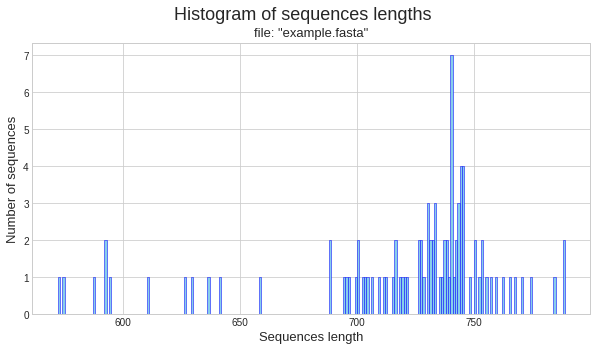

In [132]:
example_fasta.histo_length()